In [1]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
import datetime

Mounted at /content/drive


In [2]:
log=pd.read_csv('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/log_data.csv')

FileNotFoundError: ignored

In [ ]:
df_최종yes = pd.read_csv('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/최종신청o클러.csv',index_col=0)

In [ ]:
df_최종yes.rename(columns={'desired_amount':''})

,,main_cluster,credit_score,working month,sub_cluster,purpose,personal_rehab,yearly_income,app_count,apply_count,loanlimit_mean,rate_mean,labels
user_id,,,,,,,,,,,,,
11,1.950000e+07,Cluster 5,662.500000,10.750000,Cluster 7,LIVING,unknown,2.650000e+07,30.956990,0.750000,1.706484e+07,14.115472,4
17,6.500000e+06,Cluster 5,540.000000,3.000000,Cluster 7,LIVING,unknown,5.000000e+07,14.500000,1.000000,2.700000e+07,18.233333,4
20,4.428571e+06,Cluster 5,660.000000,14.428571,None,LIVING,unknown,3.214286e+07,38.559727,0.833333,1.315960e+07,11.584170,4
24,5.000000e+06,Cluster 5,640.000000,55.000000,Cluster 7,LIVING,B,4.400000e+07,39.395833,1.500000,1.806250e+07,11.860417,4
27,1.900000e+07,Cluster 5,586.000000,3.000000,Cluster 7,LIVING,unknown,3.420000e+07,31.727381,0.400000,1.548690e+07,16.440595,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879691,3.500000e+07,Cluster 5,620.000000,3.000000,None,SWITCHLOAN,unknown,3.100000e+07,35.750962,1.000000,1.080071e+07,11.652817,4
879692,2.540000e+07,Cluster 5,790.000000,15.000000,Cluster 7,LIVING,unknown,4.400000e+07,26.966667,1.200000,2.461667e+07,13.840000,4
879693,4.000000e+06,Cluster 5,668.000000,7.400000,Cluster 7,LIVING,D,2.400000e+07,31.126667,0.400000,1.505000e+07,18.309333,4


In [ ]:
df_최종yes

,desired_amount,main_cluster,credit_score,working month,sub_cluster,purpose,personal_rehab,yearly_income,app_count,apply_count,loanlimit_mean,rate_mean,labels
user_id,,,,,,,,,,,,,
11,1.950000e+07,Cluster 5,662.500000,10.750000,Cluster 7,LIVING,unknown,2.650000e+07,30.956990,0.750000,1.706484e+07,14.115472,4
17,6.500000e+06,Cluster 5,540.000000,3.000000,Cluster 7,LIVING,unknown,5.000000e+07,14.500000,1.000000,2.700000e+07,18.233333,4
20,4.428571e+06,Cluster 5,660.000000,14.428571,None,LIVING,unknown,3.214286e+07,38.559727,0.833333,1.315960e+07,11.584170,4
24,5.000000e+06,Cluster 5,640.000000,55.000000,Cluster 7,LIVING,B,4.400000e+07,39.395833,1.500000,1.806250e+07,11.860417,4
27,1.900000e+07,Cluster 5,586.000000,3.000000,Cluster 7,LIVING,unknown,3.420000e+07,31.727381,0.400000,1.548690e+07,16.440595,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879691,3.500000e+07,Cluster 5,620.000000,3.000000,None,SWITCHLOAN,unknown,3.100000e+07,35.750962,1.000000,1.080071e+07,11.652817,4
879692,2.540000e+07,Cluster 5,790.000000,15.000000,Cluster 7,LIVING,unknown,4.400000e+07,26.966667,1.200000,2.461667e+07,13.840000,4
879693,4.000000e+06,Cluster 5,668.000000,7.400000,Cluster 7,LIVING,D,2.400000e+07,31.126667,0.400000,1.505000e+07,18.309333,4


In [ ]:
#radar 차트를 만들기 위한 minmax스케일링
from sklearn.preprocessing import MinMaxScaler
df_최종yes.loc[:,['yearly_income','desired_amount','loanlimit_mean','working month','apply_count']] = np.log1p(df_최종yes.loc[:,['yearly_income','desired_amount','loanlimit_mean','working month','apply_count']])
scaler = MinMaxScaler()
scaler.fit(df_최종yes.iloc[:,[0,2,3,7,8,9,10,11]])
df_최종yes.iloc[:,[0,2,3,7,8,9,10,11]]=scaler.transform(df_최종yes.iloc[:,[0,2,3,7,8,9,10,11]])
df_최종yes.describe

<bound method NDFrame.describe of          desired_amount main_cluster  credit_score  working month sub_cluster  \
user_id                                                                         
11             0.729003    Cluster 5      0.577068       0.384631   Cluster 7   
17             0.681291    Cluster 5      0.451395       0.216414   Cluster 7   
20             0.664626    Cluster 5      0.574503       0.427150        None   
24             0.669897    Cluster 5      0.553985       0.628396   Cluster 7   
27             0.727875    Cluster 5      0.498586       0.216414   Cluster 7   
...                 ...          ...           ...            ...         ...   
879691         0.754407    Cluster 5      0.533467       0.216414        None   
879692         0.740483    Cluster 5      0.707870       0.432828   Cluster 7   
879693         0.660206    Cluster 5      0.582710       0.332237   Cluster 7   
879695         0.717609    Cluster 5      0.557552       0.216414        No

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

## **연속형 변수**

In [ ]:
df_mean=df_최종yes.groupby('labels').mean()

In [ ]:
df = df_mean.copy()

In [ ]:
df['cluster_name']=df.index
df.index = range(5)
df.columns

Index(['desired_amount', 'credit_score', 'working month', 'yearly_income',
       'app_count', 'apply_count', 'loanlimit_mean', 'rate_mean',
       'cluster_name'],
      dtype='object')

In [ ]:
df=df[['cluster_name','desired_amount', 'credit_score', 'working month', 'yearly_income',
       'app_count','loanlimit_mean', 'rate_mean']]
df

,cluster_name,desired_amount,credit_score,working month,yearly_income,app_count,loanlimit_mean,rate_mean
0,0,8.390807e+08,694.023309,76.169607,5.080649e+09,30.566895,3.412397e+07,13.345792
1,1,1.684156e+09,701.004684,54.551769,1.674691e+08,31.164572,1.865093e+07,13.868605
2,2,7.016776e+09,731.695166,38.689443,1.065981e+08,31.881971,1.938277e+07,13.895576
3,3,1.507468e+08,688.508095,73.347895,1.359155e+09,30.547495,2.833472e+07,13.985607
4,4,2.328971e+07,659.949150,39.600905,4.129712e+07,31.883526,1.630154e+07,14.080735


In [ ]:
import matplotlib as mpl

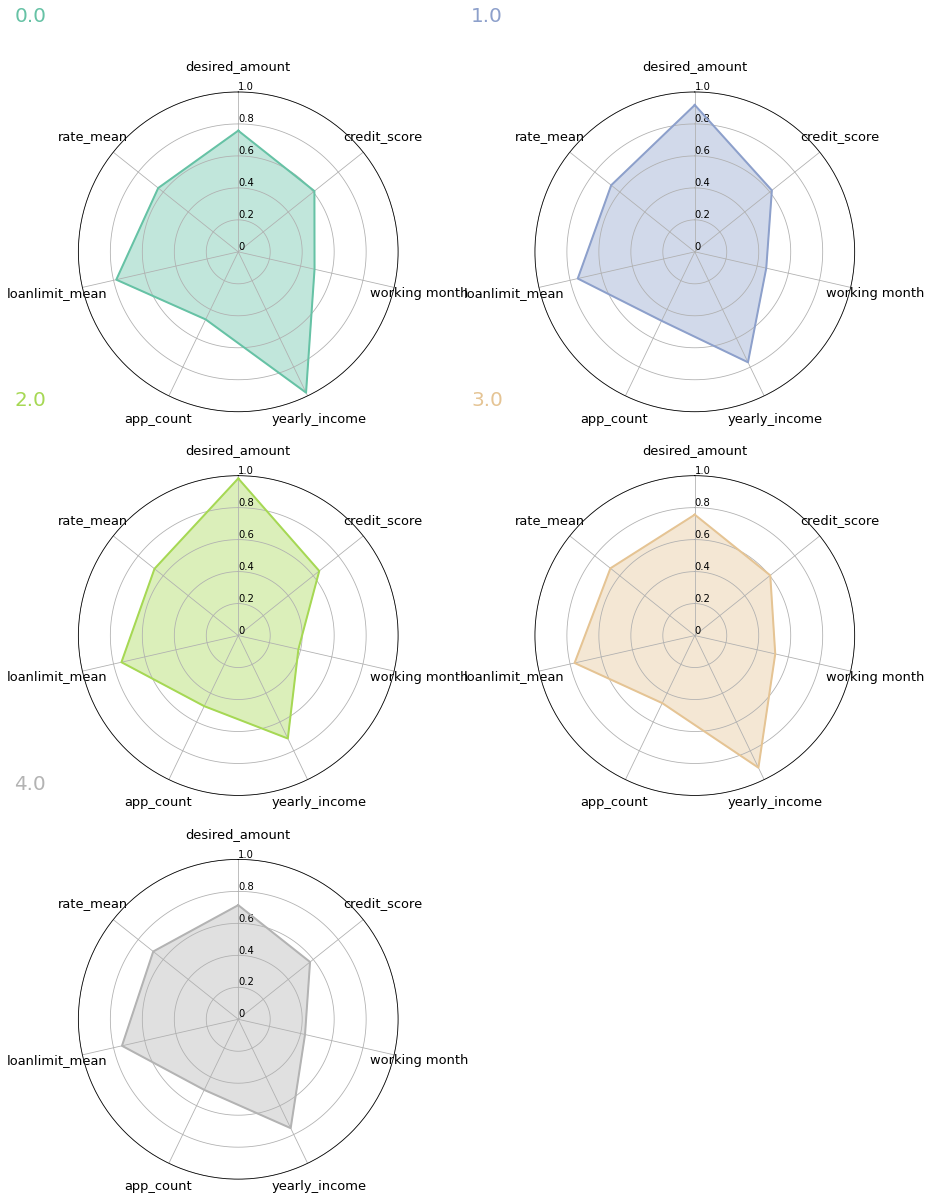

<Figure size 1080x1440 with 0 Axes>

In [ ]:
## 따로 그리기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('cluster_name').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['0','0.2','0.4','0.6','0.8','1.0'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,1)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.cluster_name, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.

fig = plt.figure(figsize=(15,20))
mpl.rcParams['font.size']=30
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.savefig('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/최종신청yes-radar.png',dpi=600)

# **범주형 번수**

In [ ]:
df_최종yes

,desired_amount,main_cluster,credit_score,working month,sub_cluster,purpose,personal_rehab,yearly_income,app_count,apply_count,loanlimit_mean,rate_mean,labels
user_id,,,,,,,,,,,,,
11,0.729003,Cluster 5,0.577068,0.384631,Cluster 7,LIVING,unknown,0.748930,0.475508,0.204126,0.755322,0.681917,4
17,0.681291,Cluster 5,0.451395,0.216414,Cluster 7,LIVING,unknown,0.776748,0.214286,0.253592,0.776133,0.904505,4
20,0.664626,Cluster 5,0.574503,0.427150,None,LIVING,unknown,0.757389,0.596186,0.221359,0.743535,0.545090,4
24,0.669897,Cluster 5,0.553985,0.628396,Cluster 7,LIVING,B,0.771147,0.609458,0.336254,0.757899,0.560023,4
27,0.727875,Cluster 5,0.498586,0.216414,Cluster 7,LIVING,unknown,0.760107,0.487736,0.121464,0.750921,0.807600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879691,0.754407,Cluster 5,0.533467,0.216414,None,SWITCHLOAN,unknown,0.755803,0.551603,0.253592,0.734575,0.548801,4
879692,0.740483,Cluster 5,0.707870,0.432828,Cluster 7,LIVING,unknown,0.771147,0.412169,0.288899,0.771942,0.667027,4
879693,0.660206,Cluster 5,0.582710,0.332237,Cluster 7,LIVING,D,0.744589,0.478201,0.121464,0.749623,0.908613,4


In [ ]:
obj=df_최종yes.iloc[:,[1,4,5,6,12]]

In [ ]:
obj

,main_cluster,sub_cluster,purpose,personal_rehab,labels
user_id,,,,,
11,Cluster 5,Cluster 7,LIVING,unknown,4
17,Cluster 5,Cluster 7,LIVING,unknown,4
20,Cluster 5,None,LIVING,unknown,4
24,Cluster 5,Cluster 7,LIVING,B,4
27,Cluster 5,Cluster 7,LIVING,unknown,4
...,...,...,...,...,...
879691,Cluster 5,None,SWITCHLOAN,unknown,4
879692,Cluster 5,Cluster 7,LIVING,unknown,4
879693,Cluster 5,Cluster 7,LIVING,D,4


In [ ]:
mclu_obj=obj.groupby(['labels','main_cluster']).count()['purpose']
mclu_obj.groupby('labels').sum()

labels
0        43
1       263
2        49
3       155
4    165314
Name: purpose, dtype: int64

In [ ]:
mpl.rcParams['font.size']=15

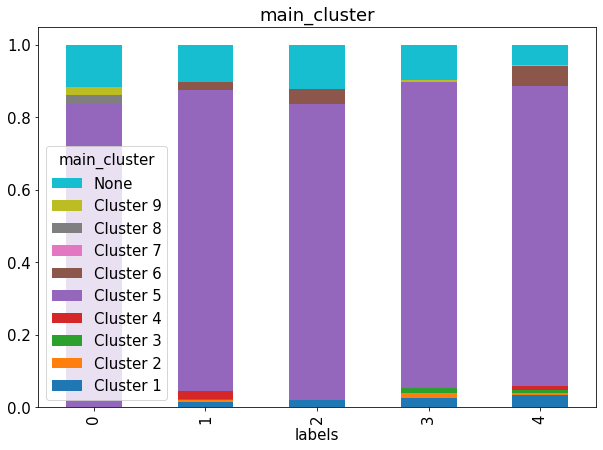

In [ ]:
mclu_por=mclu_obj.unstack().T/mclu_obj.groupby('labels').sum()
mclu_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))
plt.title('main_cluster')
plt.savefig('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/최종신청yes-main시계열.png',dpi=600)

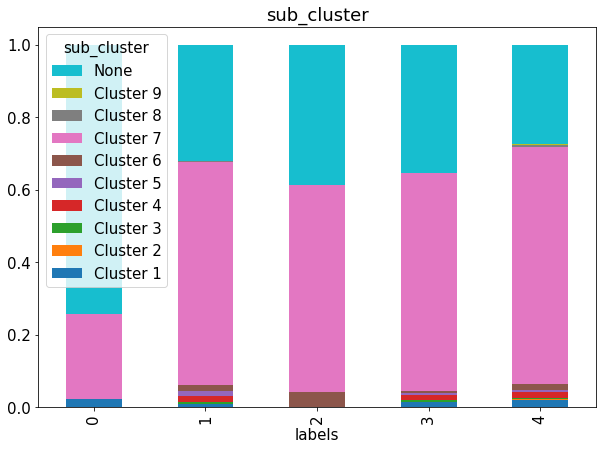

In [ ]:
mclu_obj=obj.groupby(['labels','sub_cluster']).count()['purpose']
mclu_por=mclu_obj.unstack().T/mclu_obj.groupby('labels').sum()
mclu_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))
plt.title('sub_cluster')
plt.savefig('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/최종신청yes-sub시계열.png',dpi=600)

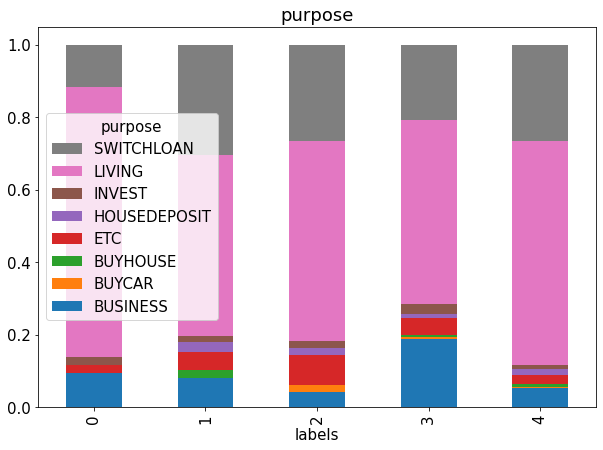

In [ ]:
mclu_obj=obj.groupby(['labels','purpose']).count()['main_cluster']
mclu_por=mclu_obj.unstack().T/mclu_obj.groupby('labels').sum()
mclu_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))
plt.title('purpose')
plt.savefig('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/최종신청yes-purpose.png',dpi=600)

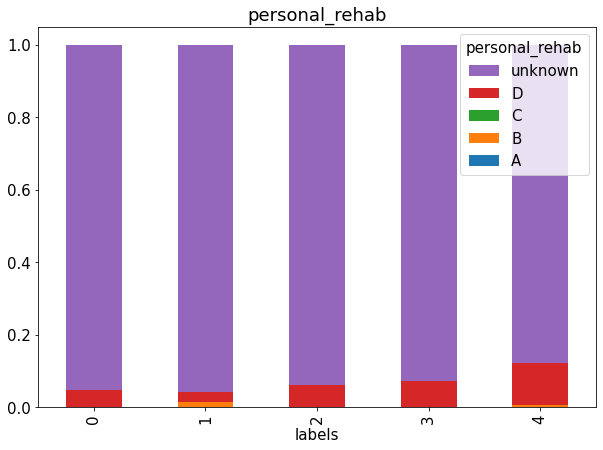

In [ ]:
mclu_obj=obj.groupby(['labels','personal_rehab']).count()['main_cluster']
mclu_por=mclu_obj.unstack().T/mclu_obj.groupby('labels').sum()
mclu_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))
plt.title('personal_rehab')
plt.savefig('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/최종신청yes-personal_rehab.png',dpi=600)

## **프로세스 마이닝**

In [ ]:
!pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pm4py.objects.conversion.log import converter as log_converter

In [ ]:
최종yes_id_0= df_최종yes[df_최종yes['labels']==0].index
최종yes_id_1= df_최종yes[df_최종yes['labels']==1].index
최종yes_id_2= df_최종yes[df_최종yes['labels']==2].index
최종yes_id_3= df_최종yes[df_최종yes['labels']==3].index
최종yes_id_4= df_최종yes[df_최종yes['labels']==4].index

In [ ]:
최종yes_0_log=log[log['user_id'].isin(최종yes_id_0)]
최종yes_1_log=log[log['user_id'].isin(최종yes_id_1)]
최종yes_2_log=log[log['user_id'].isin(최종yes_id_2)]
최종yes_3_log=log[log['user_id'].isin(최종yes_id_3)]
최종yes_4_log=log[log['user_id'].isin(최종yes_id_4)]

In [ ]:
최종yes_0_log.loc[:,'timestamp'] = pd.to_datetime(최종yes_0_log['timestamp'])
최종yes_1_log.loc[:,'timestamp'] = pd.to_datetime(최종yes_1_log['timestamp'])
최종yes_2_log.loc[:,'timestamp'] = pd.to_datetime(최종yes_2_log['timestamp'])
최종yes_3_log.loc[:,'timestamp'] = pd.to_datetime(최종yes_3_log['timestamp'])
최종yes_4_log.loc[:,'timestamp'] = pd.to_datetime(최종yes_4_log['timestamp'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# 0

In [ ]:
data=최종yes_0_log.loc[:,['user_id','timestamp','event']]
data.rename(columns={'user_id':'case:concept:name','event':'concept:name','timestamp':'time:timestamp'},inplace=True)
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY:'case:concept:name'}
event_log = log_converter.apply(data, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)

In [ ]:
from pm4py.objects.conversion.log.converter import to_data_frame
data = to_data_frame.apply(event_log)
data

,time:timestamp,concept:name,case:concept:name
0,2022-03-07 20:36:48,Login,846697
1,2022-03-07 20:37:05,EndLoanApply,846697
2,2022-03-07 21:52:03,EndLoanApply,846697
3,2022-05-20 08:04:56,OpenApp,615991
4,2022-05-20 08:05:02,Login,615991
...,...,...,...
1616,2022-05-16 17:46:51,StartLoanApply,118401
1617,2022-05-16 17:46:51,EndLoanApply,118401
1618,2022-05-16 17:46:53,ViewLoanApplyIntro,118401
1619,2022-05-16 17:50:48,CompleteIDCertification,118401


In [ ]:
from pm4py.algo.filtering.pandas.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(data, attribute_key='concept:name')
activities

{'OpenApp': 324,
 'EndLoanApply': 296,
 'Login': 284,
 'StartLoanApply': 244,
 'ViewLoanApplyIntro': 173,
 'GetCreditInfo': 118,
 'CompleteIDCertification': 95,
 'UseLoanManage': 74,
 'SignUp': 13}

In [ ]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

In [ ]:
heu_net = heuristics_miner.apply_heu(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH :0.9,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT :10,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES :10,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH :0.8,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH:3})

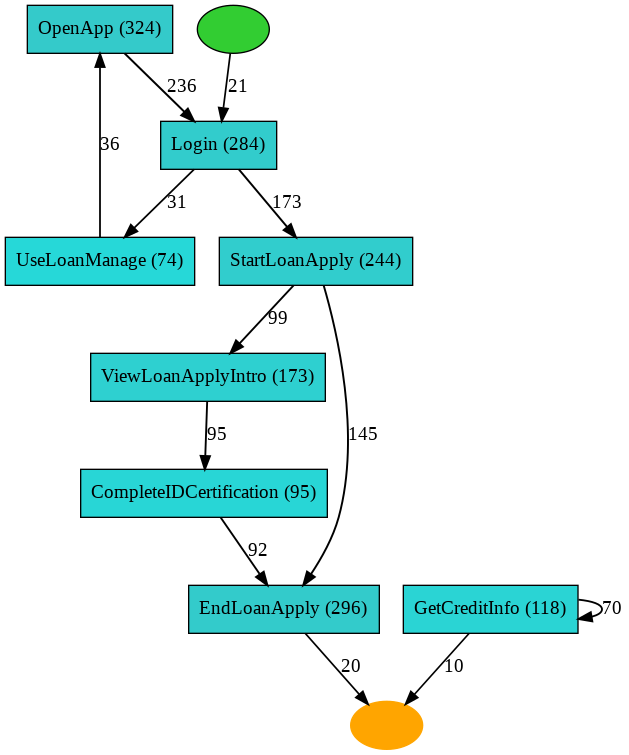

In [ ]:
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)


In [ ]:
# 1

In [ ]:
data=최종yes_1_log.loc[:,['user_id','timestamp','event']]
data.rename(columns={'user_id':'case:concept:name','event':'concept:name','timestamp':'time:timestamp'},inplace=True)
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY:'case:concept:name'}
event_log = log_converter.apply(data, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)
data = to_data_frame.apply(event_log)
activities = attributes_filter.get_attribute_values(data, attribute_key='concept:name')
activities


NameError: ignored

In [ ]:
heu_net = heuristics_miner.apply_heu(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH :0.9,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT :10,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES :10,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH :0.8,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH:3})

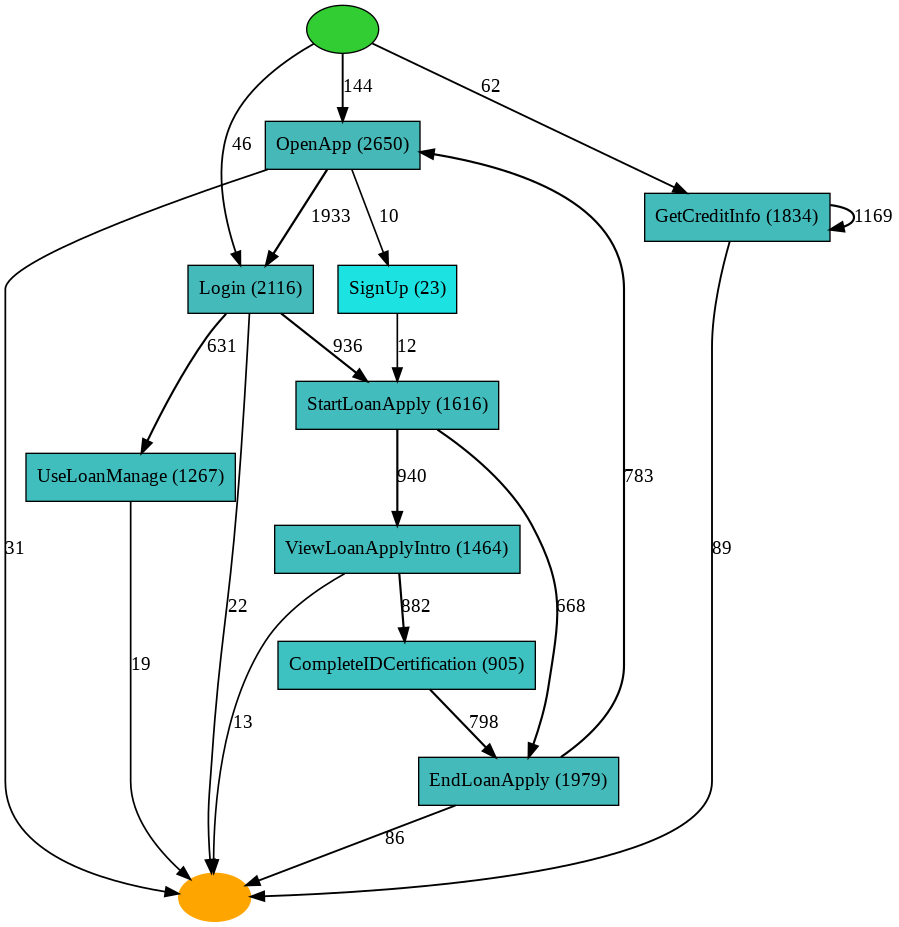

In [ ]:
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

In [ ]:
# 2

In [ ]:
data=최종yes_2_log.loc[:,['user_id','timestamp','event']]
data.rename(columns={'user_id':'case:concept:name','event':'concept:name','timestamp':'time:timestamp'},inplace=True)
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY:'case:concept:name'}
event_log = log_converter.apply(data, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)
data = to_data_frame.apply(event_log)
activities = attributes_filter.get_attribute_values(data, attribute_key='concept:name')
activities

{'OpenApp': 403,
 'Login': 322,
 'EndLoanApply': 307,
 'StartLoanApply': 259,
 'GetCreditInfo': 210,
 'ViewLoanApplyIntro': 189,
 'UseLoanManage': 177,
 'CompleteIDCertification': 138,
 'SignUp': 3}

In [ ]:
heu_net = heuristics_miner.apply_heu(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH :0.9,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT :10,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES :10,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH :0.8,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH:3})

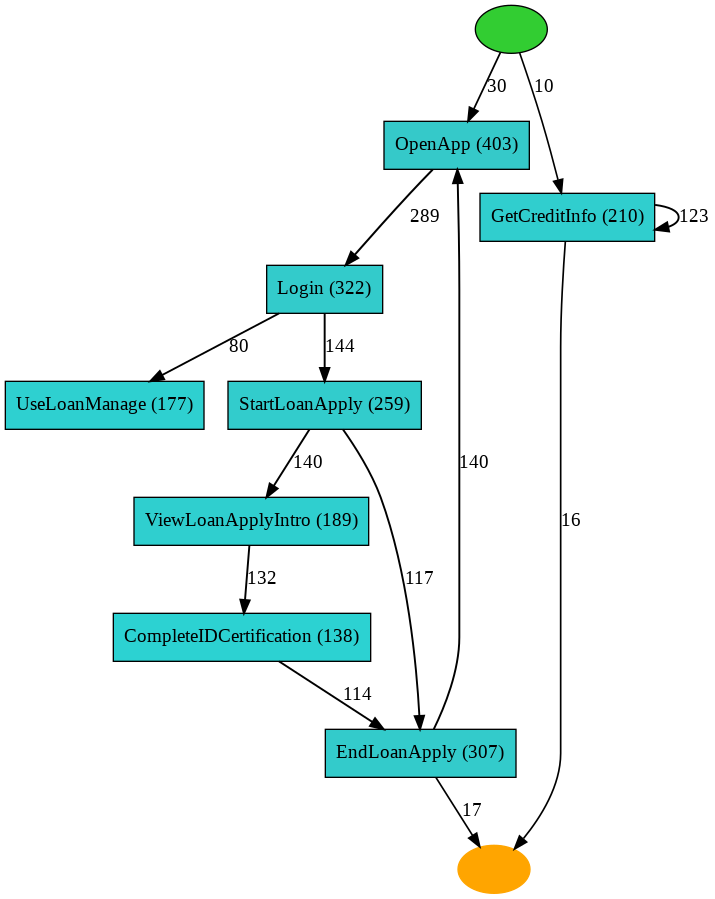

In [ ]:
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

In [ ]:
# 3

In [ ]:
data=최종yes_3_log.loc[:,['user_id','timestamp','event']]
data.rename(columns={'user_id':'case:concept:name','event':'concept:name','timestamp':'time:timestamp'},inplace=True)
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY:'case:concept:name'}
event_log = log_converter.apply(data, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)
data = to_data_frame.apply(event_log)
activities = attributes_filter.get_attribute_values(data, attribute_key='concept:name')
activities

{'OpenApp': 1861,
 'Login': 1524,
 'EndLoanApply': 1467,
 'StartLoanApply': 1199,
 'GetCreditInfo': 1128,
 'ViewLoanApplyIntro': 1055,
 'CompleteIDCertification': 741,
 'UseLoanManage': 725,
 'SignUp': 13,
 'UsePrepayCalc': 2,
 'UseDSRCalc': 1}

In [ ]:
heu_net = heuristics_miner.apply_heu(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH :0.9,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT :1,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES :10,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH :0.8,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH:3})

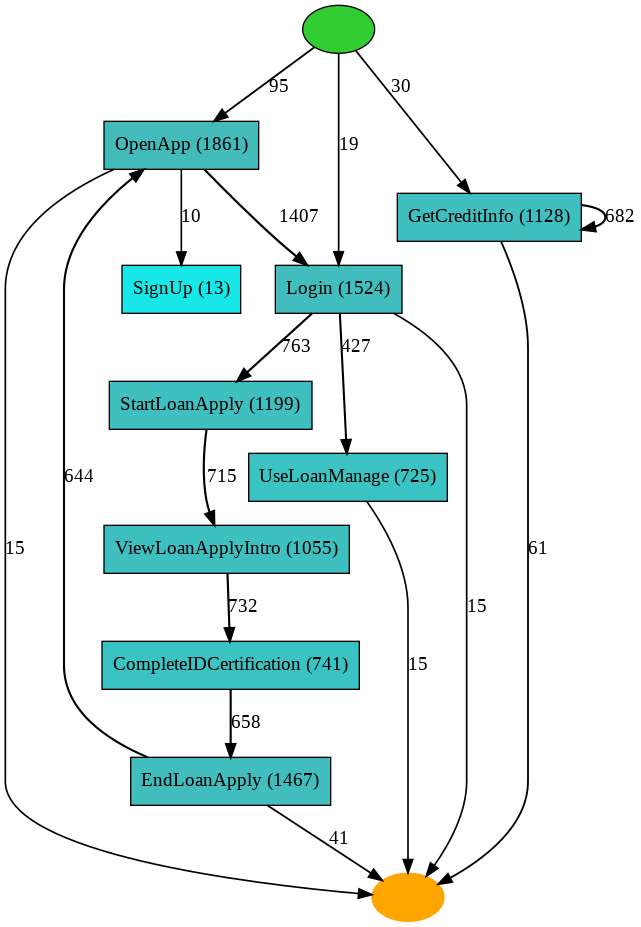

In [ ]:
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

In [ ]:
#4

In [ ]:
data=최종yes_4_log.loc[:,['user_id','timestamp','event']]
data.rename(columns={'user_id':'case:concept:name','event':'concept:name','timestamp':'time:timestamp'},inplace=True)
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY:'case:concept:name'}
event_log = log_converter.apply(data, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)
data = to_data_frame.apply(event_log)
activities = attributes_filter.get_attribute_values(data, attribute_key='concept:name')
activities

NameError: ignored

In [ ]:
heu_net = heuristics_miner.apply_heu(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH :0.9,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT :1,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES :10,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH :0.8,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH:3})

In [ ]:
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)